# Model evaluation(Standard)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').\
                            fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [8]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Confusion matrices

In [9]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


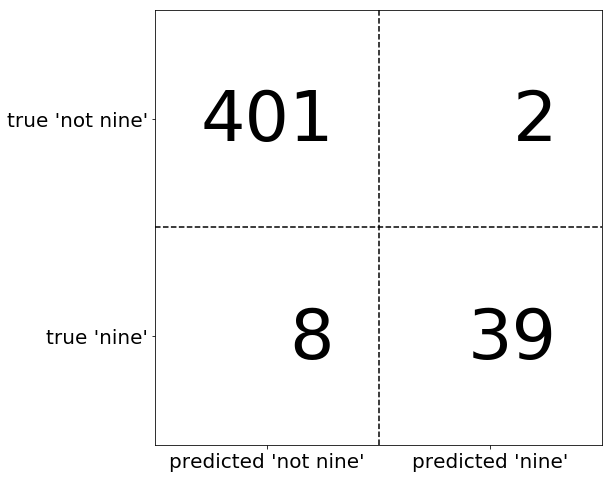

In [10]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

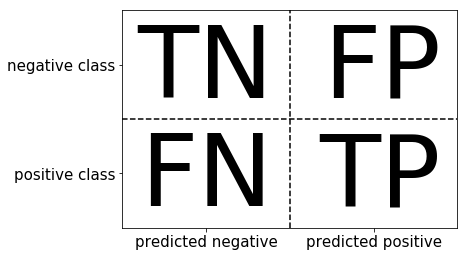

In [11]:
mglearn.plots.plot_binary_confusion_matrix()

In [13]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[353  50]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


###### 정확도와의 관계
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

###### 정밀도, 재현율, f-점수
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [14]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".\
                format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".\
                format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.12
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [23]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.92      0.91       403
           9       0.11      0.09      0.09        47

   micro avg       0.83      0.83      0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.83      0.82       450



In [24]:
print(classification_report(y_test, pred_tree,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [25]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



##### 불확실성 고려

In [44]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), centers=2, \
                  cluster_std=[7.0, 2], random_state=22)
print(X, y) 


[[-1.13123317e+01 -1.20918530e+00]
 [ 3.63377400e+00  2.58952562e+00]
 [-2.03502489e+00  3.38227669e+00]
 [-5.91332658e+00  1.25783496e+01]
 [-1.55257743e+01 -9.00101590e+00]
 [-3.27459673e+00  2.05854157e+00]
 [-3.38538661e+00 -5.83864971e+00]
 [-2.40737735e+00  1.35475275e+00]
 [-3.57544439e+00 -5.33265314e+00]
 [-2.80476414e+00 -1.31700661e+00]
 [-1.26992172e+01 -8.87231672e+00]
 [-7.04586997e+00 -3.21313828e+00]
 [ 2.40570228e+00 -5.19551470e+00]
 [-1.01731953e+01 -5.85196829e+00]
 [-5.52518616e+00  3.81125199e+00]
 [-1.03533045e+01  1.99489625e+00]
 [-1.34664801e+00  5.06861451e+00]
 [-2.41046853e+00  6.33209004e+00]
 [ 6.09258713e+00  2.06579987e+00]
 [-8.07561536e+00 -3.70871625e+00]
 [ 1.64358585e+00 -7.06886588e+00]
 [-1.68091223e+00 -1.00768886e+01]
 [-9.27603241e+00  1.17658621e-01]
 [-7.55262603e+00  3.12471356e+00]
 [ 8.49341927e-01  5.96754110e+00]
 [-1.71652375e+00  4.89984429e+00]
 [ 5.59384574e+00 -9.54550755e+00]
 [-5.55877909e+00  8.44258335e+00]
 [ 1.77902916e+00 -1

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [46]:
X_train, X_test, y_train, y_test = \
                     train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05, probability = True)
svc.fit(X_train, y_train) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [48]:
svc.decision_function(X_test)[:10]

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866])

In [49]:
svc.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [50]:
y_pred_lower_threshold = svc.decision_function(X_test) > -1.0

In [51]:
y_pred_lower_threshold[:10]

array([ True, False, False,  True, False, False, False,  True, False,
       False])

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.63      0.78       104
           1       0.19      1.00      0.32         9

   micro avg       0.66      0.66      0.66       113
   macro avg       0.60      0.82      0.55       113
weighted avg       0.94      0.66      0.74       113



In [53]:
y_pred_lower_threshold = svc.decision_function(X_test) > 1

In [54]:
y_pred_lower_threshold[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [55]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.50      0.22      0.31         9

   micro avg       0.92      0.92      0.92       113
   macro avg       0.72      0.60      0.63       113
weighted avg       0.90      0.92      0.91       113



In [56]:
svc.predict_proba(X_test)

array([[0.94269417, 0.05730583],
       [0.94290837, 0.05709163],
       [0.9574792 , 0.0425208 ],
       [0.94087183, 0.05912817],
       [0.94399026, 0.05600974],
       [0.94276047, 0.05723953],
       [0.94346745, 0.05653255],
       [0.21562062, 0.78437938],
       [0.94329528, 0.05670472],
       [0.943073  , 0.056927  ],
       [0.94284628, 0.05715372],
       [0.15430395, 0.84569605],
       [0.94521286, 0.05478714],
       [0.82307289, 0.17692711],
       [0.84808183, 0.15191817],
       [0.94287475, 0.05712525],
       [0.95334615, 0.04665385],
       [0.97820326, 0.02179674],
       [0.94261533, 0.05738467],
       [0.94281276, 0.05718724],
       [0.83528762, 0.16471238],
       [0.94414094, 0.05585906],
       [0.94262776, 0.05737224],
       [0.95238907, 0.04761093],
       [0.97211615, 0.02788385],
       [0.94311771, 0.05688229],
       [0.94158673, 0.05841327],
       [0.95335034, 0.04664966],
       [0.32336614, 0.67663386],
       [0.94178857, 0.05821143],
       [0.

In [74]:
y_pred_threshold = svc.decision_function(X_test) > 1.2
y_pred_threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [75]:
# import numpy as np
# y_pred_threshold = y_pred_threshold.argmax(axis=1)

In [76]:
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       104
           1       1.00      0.11      0.20         9

   micro avg       0.93      0.93      0.93       113
   macro avg       0.96      0.56      0.58       113
weighted avg       0.93      0.93      0.90       113



##### 정밀도-재현율 곡선과 ROC 곡선

In [57]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
print(thresholds)

[-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.08436417  1.25059991]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


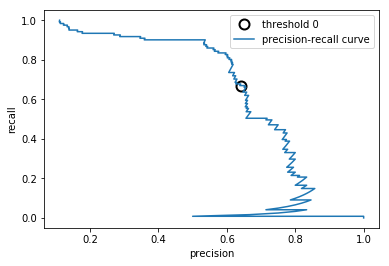

In [60]:
import matplotlib.pyplot as plt
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다 - predict함수 기본 임계값
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")

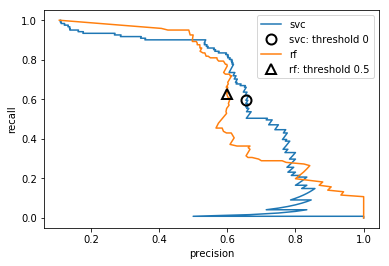

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

svc = SVC(gamma=.05, probability=True).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")

close_default_svc = np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default_svc], recall[close_default_svc], 'o', markersize=10,
         label="svc: threshold 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], \
 '^', c='k', markersize=10, label="rf: threshold 0.5", fillstyle="none", mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")

In [82]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".\
      format(f1_score(y_test, svc.predict(X_test))))


랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [83]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, \
                    rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, \
                    svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


##### ROC 와 AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}


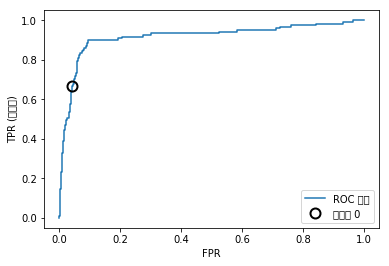

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, \
                    svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="임계값 0", \
         fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

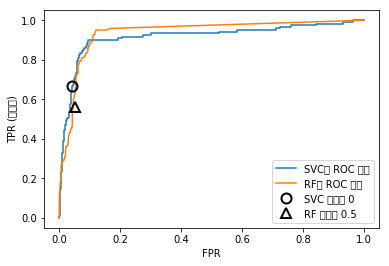

In [85]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, \
                        rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [86]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))
# ROC곡선 아래 면적(AUC점수) - roc_auc_socre

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


## 다중 분류의 평가 지표

In [88]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


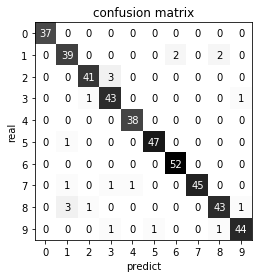

In [89]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='predict',
    ylabel='real', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("confusion matrix")
plt.gca().invert_yaxis()

In [90]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [91]:
print("accuracy 점수: {:.3f}".format(accuracy_score(y_test, pred)))
print("micro 평균 f1 점수: {:.3f}".\
      format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".\
      format(f1_score(y_test, pred, average="macro")))
print("macro 평균 f1 점수: {:.3f}".\
      format(f1_score(y_test, pred, average="weighted")))

accuracy 점수: 0.953
micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954
macro 평균 f1 점수: 0.953


# 회귀 평가 지표

### 모델 선택에서 평가 지표 사용하기

In [ ]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표: {}".format(
      cross_val_score(SVC(), digits.data, digits.target == 9)))
# scoring="accuracy"의 결과는 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, \
                    digits.target == 9, scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, \
                digits.target == 9, scoring="roc_auc")

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다.  기본은 accuracy
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".\
      format(grid.best_score_))
print("테스트 세트 accuracy: {:.3f}".\
      format(grid.score(X_test, y_test)))
print("테스트 세트 AUC: {:.3f}".format(
        roc_auc_score(y_test, \
                grid.decision_function(X_test))))
print("테스트 세트 accuracy: {:.3f}".\
      format(grid.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.970
테스트 세트 accuracy: 0.973
테스트 세트 AUC: 0.992
테스트 세트 accuracy: 0.973


In [ ]:
# AUC 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, \
                    scoring="roc_auc")
grid.fit(X_train, y_train)
print("AUC 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (AUC): {:.3f}".\
      format(grid.best_score_))
print("테스트 세트 AUC: {:.3f}".\
      format(grid.score(X_test, y_test)))